In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhatp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhatp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
customer = pd.read_csv("twcs/twcs.csv")

In [ ]:
customer.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [ ]:
company = customer.text.str.extract('@([^\s]+)(.+)', expand = True)
company.head()

,0,1
0,115712,I understand. I would like to assist you. We ...
1,sprintcare,and how do you propose we do that
2,sprintcare,I have sent several private messages and no o...
3,115712,Please send us a Private Message so that we c...
4,sprintcare,I did.


In [ ]:
customer_company = pd.concat([customer, company], axis=1)

In [ ]:
customer_company = customer_company.rename(columns={0: "receiver", 1: "Text"})
customer_company.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,receiver,Text
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,115712,I understand. I would like to assist you. We ...
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare,and how do you propose we do that
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,sprintcare,I have sent several private messages and no o...
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,115712,Please send us a Private Message so that we c...
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,sprintcare,I did.


In [ ]:
customer_company['created_at'] = pd.to_datetime(customer_company['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

# Data Preprocessing

## Cleaning

In [ ]:
customer.drop('tweet_id', axis = 1, inplace = True)
customer = customer[~customer['text'].isnull()]

def preprocess(CleanText):
    CleanText = CleanText.str.replace("(<br/>)", "")
    CleanText = CleanText.str.replace('(<a).*(>).*(</a>)', '')
    CleanText = CleanText.str.replace('(&amp)', '')
    CleanText = CleanText.str.replace('(&gt)', '')
    CleanText = CleanText.str.replace('(&lt)', '')
    CleanText = CleanText.str.replace('(\xa0)', ' ')  
    return CleanText

customer_company['Text'] = preprocess(customer_company['Text'])

C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\1698247414.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  CleanText = CleanText.str.replace("(<br/>)", "")
C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\1698247414.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  CleanText = CleanText.str.replace('(<a).*(>).*(</a>)', '')
C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\1698247414.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  CleanText = CleanText.str.replace('(&amp)', '')
C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\1698247414.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  CleanText = CleanText.str.replace('(&gt)', '')
C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\1698247414.py:9: FutureWarning: The default value of regex will change from True to False in a futur

## Stopword Removal

In [ ]:
 nltk.download('stopwords')
stopword = stopwords.words('english')

In [ ]:
customer_company['Text'] = customer_company['Text'].fillna(" ")

In [ ]:
# Removing stopwords and punctuations from the tweets
customer_company['cleaned'] = customer_company['Text'].str.replace('[^\w\s]','')
#customer_company['cleaned'].head()
customer_company['cleaned'] = customer_company['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))
customer_company['cleaned'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhatp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\1021628505.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_company['cleaned'] = customer_company['Text'].str.replace('[^\w\s]','')


0    I understand I would like assist We would need...
1                                              propose
2    I sent several private messages one responding...
3    Please send us Private Message assist Just cli...
4                                                    I
Name: cleaned, dtype: object

In [ ]:
support = customer_company[customer_company['inbound'] == False]
support.drop('inbound', axis=1, inplace=True)

C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\1503030372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  support.drop('inbound', axis=1, inplace=True)


In [ ]:
client = customer_company[customer_company['inbound'] == True] 
client.drop('inbound', axis=1, inplace=True)

C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\2081983733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client.drop('inbound', axis=1, inplace=True)


# Exploratory Data Analysis

In [ ]:
customer['word_count'] = customer['text'].apply(lambda x: len(str(x).split(" ")))
customer[['text','word_count']].head(5)

,text,word_count
0,@115712 I understand. I would like to assist y...,23
1,@sprintcare and how do you propose we do that,9
2,@sprintcare I have sent several private messag...,14
3,@115712 Please send us a Private Message so th...,23
4,@sprintcare I did.,3


In [ ]:
customer['stopwords'] = customer['text'].apply(lambda x: len([x for x in x.split() if x in stopword]))
customer[['text','stopwords']].head()

,text,stopwords
0,@115712 I understand. I would like to assist y...,7
1,@sprintcare and how do you propose we do that,7
2,@sprintcare I have sent several private messag...,5
3,@115712 Please send us a Private Message so th...,10
4,@sprintcare I did.,0


## WordCloud

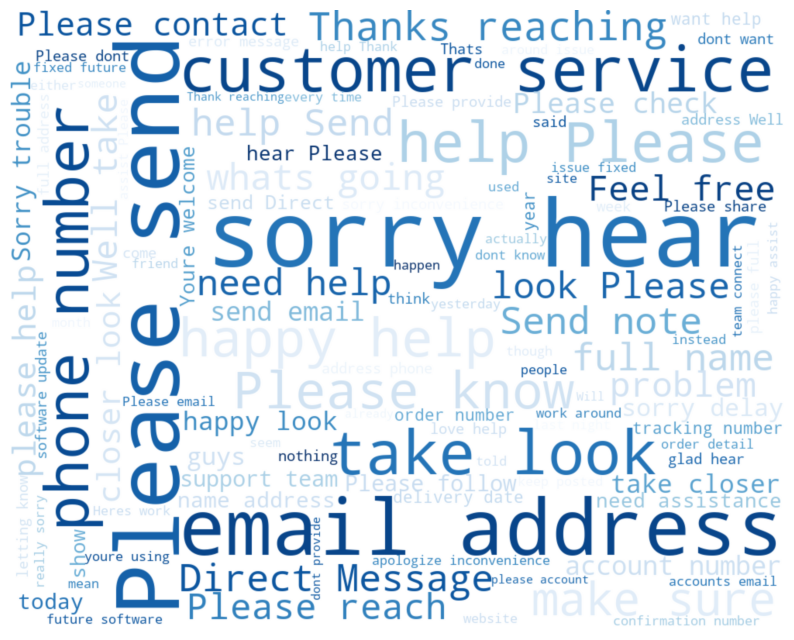

In [ ]:
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(customer_company['cleaned']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

# Questions

1. What makes a specific response satisfactory?<br>
a. Miscellaneous - Language Style
<br>As the data in the dataset contains the responses provided by some of the best companies, these responses can be analyzed to understand some of the common features in a satisfactory response. Language styles, response speed, helpfulness of answers, and other possible factors can all contribute to customer satisfaction. <br><br>
b. What is the relationship between speed of response to tweets and customer satisfaction? <br>
The created-at of the tweets, along with the responses to those tweets, can be used to understand whether there is a relation between the speed of response and customer satisfaction. The response speed is generally assumed to be highly correlated to customer satisfaction, and this hypothesis can be tested by analyzing the dataset. We will first extract words from tweets and calculate their sentiment scores. Second, we'll check if the problem is solved or is retweeted again. If so, how is the sentiment score different from the first tweet against different response speeds?

2. What are the main reasons customers look for Twitter Support? <br>
Are the problems general or specific? <br>
It's often the last step for customers to seek help from Support Team. Before that, sources like user guides or FAQs should have solved a lot of problems for customers. <br>
If conversations have eventually moved out of the Twitter platform, the problem should be considered specific. 
This can be achieved by using frequency, word clouds and topic modelling for the two categories i.e. general problems and specific problems to understand repeating reasons and the precentage of problems for each category.

3. When do Support Teams receive more tweets from customers? <br>
Effective support service can generally build customer trust and loyalty. We'll analyze the number of tweets over month, weekday, and hour to see if there is a specific pattern or link to events. Thus, brands will be able to arrange the support resources wisely and helps customers solve problems in time.

4. Company specific response analysis<br>
Different companies can have different language styles of responsing. This can be analysed using word count, stopword count, response sentiment and finding other words that are specific to responses of different companies.


# Q1 What makes a specific response satisfactory?

In [ ]:
responseTime = customer_company[['tweet_id', 'author_id', 'inbound', 'created_at', 'response_tweet_id', 'in_response_to_tweet_id', 'receiver']]
responseTime.head()

,tweet_id,author_id,inbound,created_at,response_tweet_id,in_response_to_tweet_id,receiver
0,1,sprintcare,False,2017-10-31 22:10:47,2,3.0,115712
1,2,115712,True,2017-10-31 22:11:45,NaN,1.0,sprintcare
2,3,115712,True,2017-10-31 22:08:27,1,4.0,sprintcare
3,4,sprintcare,False,2017-10-31 21:54:49,3,5.0,115712
4,5,115712,True,2017-10-31 21:49:35,4,6.0,sprintcare


In [ ]:
def getResponseTime(row):
    if pd.isnull(row['response_tweet_id']):
        return
    elif ',' in row['response_tweet_id']:
        response_id = min([int(i) for i in row['response_tweet_id'].split(',')])
    else:
        response_id = int(row['response_tweet_id'])
    return ((support[support.tweet_id == response_id]['created_at'] - row['created_at']) / pd.Timedelta(minutes=1)).to_string(index=False)

In [ ]:
responseTime_customer = responseTime[responseTime.inbound == True]

In [ ]:
responseTime_customer.receiver = responseTime_customer.receiver.fillna('0')

C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\4072304720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  responseTime_customer.receiver = responseTime_customer.receiver.fillna('0')


In [ ]:
responseTime_customer = responseTime_customer[~responseTime_customer.receiver.str.match('[0-9]+')]
responseTime_customer

,tweet_id,author_id,inbound,created_at,response_tweet_id,in_response_to_tweet_id,receiver
1,2,115712,True,2017-10-31 22:11:45,NaN,1.0,sprintcare
2,3,115712,True,2017-10-31 22:08:27,1,4.0,sprintcare
4,5,115712,True,2017-10-31 21:49:35,4,6.0,sprintcare
6,8,115712,True,2017-10-31 21:45:10,"9,6,10",NaN,sprintcare
8,12,115713,True,2017-10-31 22:04:47,"11,13,14",15.0,sprintcare
...,...,...,...,...,...,...,...
2811761,2987940,783956,True,2017-11-22 07:15:45,NaN,2811285.0,Safaricom_Care
2811763,2987942,823867,True,2017-11-22 07:30:39,2987941,NaN,AirAsiaSupport
2811765,2987944,823868,True,2017-11-22 07:43:36,2987943,NaN,AirAsiaSupport
2811768,2987946,524544,True,2017-11-22 08:25:48,2987945,NaN,VirginTrains


In [ ]:
t = responseTime_customer.apply(getResponseTime, axis=1)
t

1                None
2            2.333333
4            5.233333
6            1.233333
8                 5.8
              ...    
2811761          None
2811763     24.433333
2811765         11.35
2811768      1.766667
2811773    630.333333
Length: 1067538, dtype: object

In [ ]:
responseTime_customer['response_time_min'] = t
responseTime_customer.head()

,tweet_id,author_id,inbound,created_at,response_tweet_id,in_response_to_tweet_id,receiver,response_time_min
1,2,115712,True,2017-10-31 22:11:45,NaN,1.0,sprintcare,None
2,3,115712,True,2017-10-31 22:08:27,1,4.0,sprintcare,2.333333
4,5,115712,True,2017-10-31 21:49:35,4,6.0,sprintcare,5.233333
6,8,115712,True,2017-10-31 21:45:10,"9,6,10",NaN,sprintcare,1.233333
8,12,115713,True,2017-10-31 22:04:47,"11,13,14",15.0,sprintcare,5.8


In [ ]:
responseTime_customer['response_time_min'] = responseTime_customer['response_time_min'].replace('Series([], )', None)

In [ ]:
responseTime_customer['response_time_min'] = responseTime_customer['response_time_min'].astype(float)

In [ ]:
all = responseTime_customer.loc[:, 'response_time_min']
ap = responseTime_customer[responseTime_customer.receiver == 'AppleSupport'].loc[:, 'response_time_min']

In [ ]:
df = pd.concat([all, ap], axis=1)
df.columns = ['All', 'Apple']

In [ ]:
df.describe().applymap('{:,.2f}'.format)

,All,Apple
count,"790,593.00","63,743.00"
mean,238.07,133.25
std,"5,046.01",167.08
min,0.00,0.52
25%,5.62,21.70
50%,18.43,61.55
75%,88.87,177.68
max,"2,609,747.00","7,173.92"


In [ ]:
avg_response_time = pd.DataFrame(responseTime_customer.groupby('receiver')['response_time_min'].mean()).sort_values(by=['response_time_min'])
avg_response_time.head(10)

,response_time_min
receiver,
JetBlue!!!,0.416667
-@,0.516667
VirginTrains...they,0.533333
JetBlue—been,0.566667
alaskaair🛬,0.600000
Postmates_Help...,0.600000
Uber_support.,0.600000
AlaskaAir...See,0.783333
comcast@fo,0.783333


In [ ]:
avg_response_time = avg_response_time[avg_response_time.index.isin(support.author_id.unique())]
avg_response_time.head(10)

,response_time_min
receiver,
Postmates_Help,3.764945
VirginTrains,7.113722
LondonMidland,7.628116
VerizonSupport,7.929221
AlaskaAir,8.961892
nationalrailenq,10.090376
VirginAmerica,11.082554
TMobileHelp,11.206877
PearsonSupport,15.262299


In [ ]:
avg_response_time.to_csv('average_response_time.csv')

## Customer Sentiment

In [ ]:
customer_company['comp']=0

sid_obj = SentimentIntensityAnalyzer()
for ind in customer_company.index:

    sentiment_dict = sid_obj.polarity_scores(customer_company['Text'][ind])
 
    # decide sentiment as positive, negative and neutral
    customer_company['comp'][ind]=sentiment_dict['compound']

C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\353277459.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_company['comp'][ind]=sentiment_dict['compound']


In [ ]:
customer_company.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,receiver,Text,cleaned,comp
0,1,sprintcare,False,2017-10-31 22:10:47,@115712 I understand. I would like to assist y...,2,3.0,115712,I understand. I would like to assist you. We ...,I understand I would like assist We would need...,0.6369
1,2,115712,True,2017-10-31 22:11:45,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare,and how do you propose we do that,propose,0.0000
2,3,115712,True,2017-10-31 22:08:27,@sprintcare I have sent several private messag...,1,4.0,sprintcare,I have sent several private messages and no o...,I sent several private messages one responding...,-0.2960
3,4,sprintcare,False,2017-10-31 21:54:49,@115712 Please send us a Private Message so th...,3,5.0,115712,Please send us a Private Message so that we c...,Please send us Private Message assist Just cli...,0.4767
4,5,115712,True,2017-10-31 21:49:35,@sprintcare I did.,4,6.0,sprintcare,I did.,I,0.0000


In [ ]:
customer_sent=customer_company[customer_company.inbound == True]

In [ ]:
customer_sent.receiver = customer_sent.receiver.fillna('0')
customer_sent = customer_sent[~customer_sent.receiver.str.match('[0-9]+')]
customer_sent.head()

C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\28547814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_sent.receiver = customer_sent.receiver.fillna('0')


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,receiver,Text,cleaned,comp
1,2,115712,True,2017-10-31 22:11:45,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare,and how do you propose we do that,propose,0.0000
2,3,115712,True,2017-10-31 22:08:27,@sprintcare I have sent several private messag...,1,4.0,sprintcare,I have sent several private messages and no o...,I sent several private messages one responding...,-0.2960
4,5,115712,True,2017-10-31 21:49:35,@sprintcare I did.,4,6.0,sprintcare,I did.,I,0.0000
6,8,115712,True,2017-10-31 21:45:10,@sprintcare is the worst customer service,"9,6,10",NaN,sprintcare,is the worst customer service,worst customer service,-0.6249
8,12,115713,True,2017-10-31 22:04:47,@sprintcare You gonna magically change your co...,"11,13,14",15.0,sprintcare,You gonna magically change your connectivity ...,You gonna magically change connectivity whole ...,-0.5267


In [ ]:
comp_wise_cust_sentiment = pd.DataFrame(customer_sent.groupby('receiver')['comp'].mean()).sort_values(by=['comp'])
comp_wise_cust_sentiment = comp_wise_cust_sentiment[comp_wise_cust_sentiment.index.isin(support.author_id.unique())]
comp_wise_cust_sentiment.head(10)

,comp
receiver,
DunkinDonuts,-0.112693
KFC_UKI_Help,-0.090902
AsurionCares,-0.050198
UPSHelp,-0.011496
Ask_Spectrum,-0.008281
idea_cares,-0.007065
HPSupport,0.001196
DoorDash_Help,0.006426
KeyBank_Help,0.008416


In [ ]:
comp_wise_cust_sentiment = comp_wise_cust_sentiment.rename(columns={"comp": "customer_sent"})
comp_wise_cust_sentiment.to_csv('companywise_customer_sentiment.csv')

In [ ]:
time_vs_sent = pd.concat([avg_response_time,comp_wise_cust_sentiment], axis=1)
time_vs_sent

,response_time_min,customer_comp
receiver,,
Postmates_Help,3.764945,0.020954
VirginTrains,7.113722,0.074081
LondonMidland,7.628116,0.040598
VerizonSupport,7.929221,0.034671
AlaskaAir,8.961892,0.137968
...,...,...
ATVIAssist,2171.287875,0.040977
askvisa,3231.701814,0.061272
airtel_care,3303.582437,0.080360


In [ ]:
time_vs_sent.to_csv('time_vs_sent.csv')

<AxesSubplot: xlabel='receiver'>

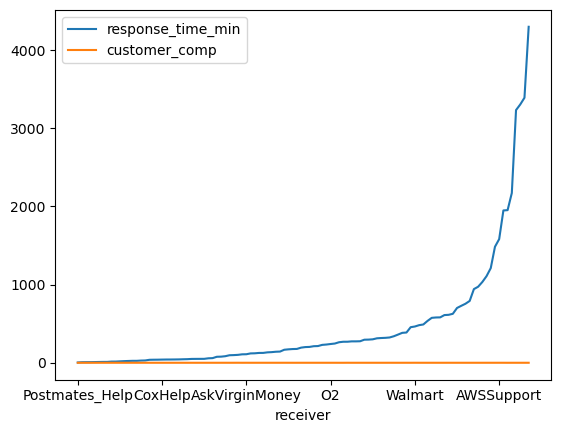

In [ ]:
time_vs_sent.plot()

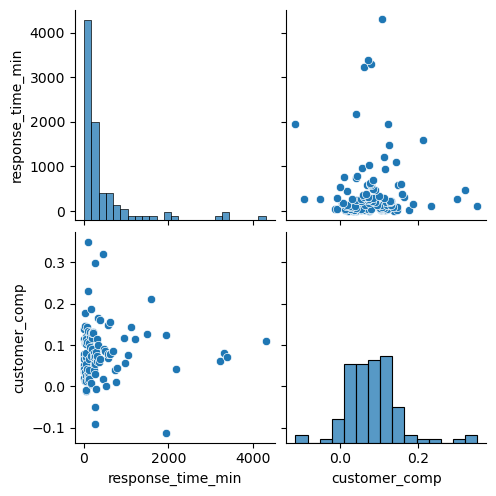

In [ ]:
sns.pairplot(time_vs_sent, kind="scatter")
plt.show()

# Q2 What are the main reasons customers look for Twitter Support?Are the problems general or specific?

## Company Specific problems

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

## Example : Apple

In [ ]:
apple = customer_company.loc[(customer_company['receiver'] == 'AppleSupport') & ( customer_company.inbound == True)]
apple.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,receiver,Text,cleaned
397,697,115854,True,2017-10-31 22:31:23,@AppleSupport The newest update. I️ made sure ...,699,696.0,AppleSupport,The newest update. I️ made sure to download i...,The newest update I made sure download yesterday
399,698,115854,True,2017-10-31 22:17:40,@AppleSupport https://t.co/NV0yucs0lB,696,700.0,AppleSupport,https://t.co/NV0yucs0lB,httpstcoNV0yucs0lB
400,700,115854,True,2017-10-31 22:16:56,@AppleSupport why are my I️’s changing not sho...,698,NaN,AppleSupport,why are my I️’s changing not showing up corre...,Is changing showing correctly social media pla...
402,702,115855,True,2017-10-31 22:11:31,@AppleSupport Tried resetting my settings .. r...,701,703.0,AppleSupport,Tried resetting my settings .. restarting my ...,Tried resetting settings restarting phone
404,704,115855,True,2017-10-31 21:59:17,@AppleSupport This is what it looks like https...,703,705.0,AppleSupport,This is what it looks like https://t.co/XCQU2...,This looks like httpstcoXCQU2l4xUB


<AxesSubplot: >

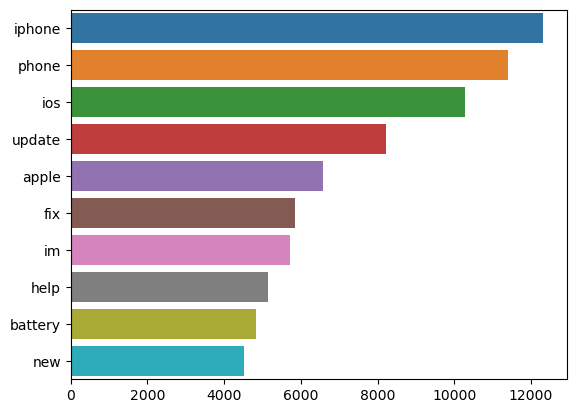

In [ ]:
# Visualising the most frequent unigrams in the tweets
top_unigrams = get_top_ngram(apple['cleaned'],1)[:10]
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x)

<AxesSubplot: >

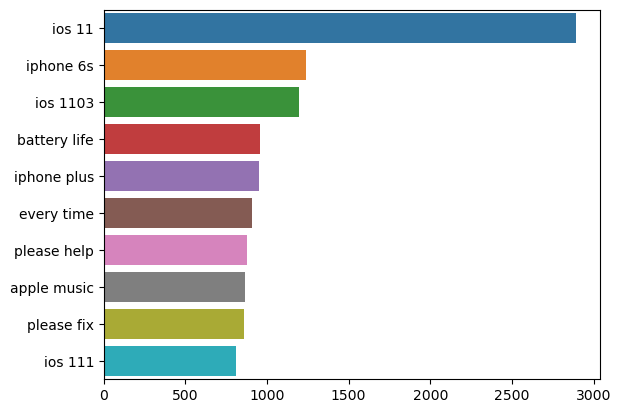

In [ ]:
# Visualising the most frequent bigrams in the tweets
top_bigrams = get_top_ngram(apple['cleaned'],2)[:10]
x,y = map(list,zip(*top_bigrams))
sns.barplot(x = y,y = x)

<AxesSubplot: >

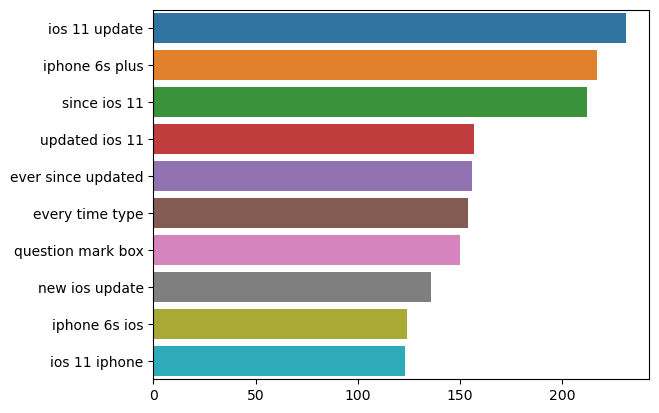

In [ ]:
# Visualising the most frequent trigrams in the tweets
top_trigrams = get_top_ngram(apple['cleaned'],3)[:10]
x,y = map(list,zip(*top_trigrams))
sns.barplot(x = y,y = x)

<AxesSubplot: >

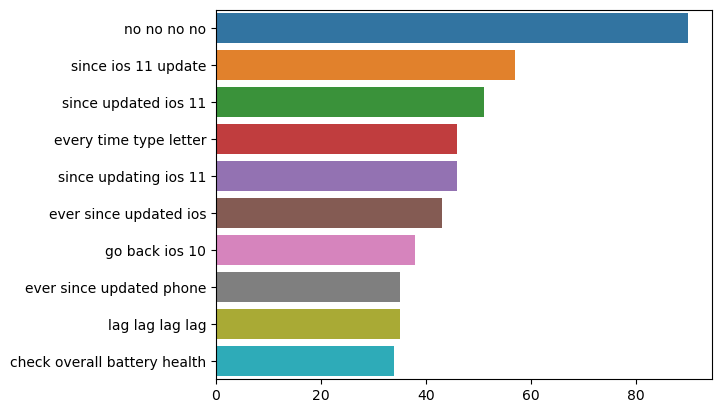

In [ ]:
# Visualising the most frequent trigrams in the tweets
top_quadgrams = get_top_ngram(apple['cleaned'],4)[:15]
x,y = map(list,zip(*top_quadgrams))
sns.barplot(x = y,y = x)

<AxesSubplot: >

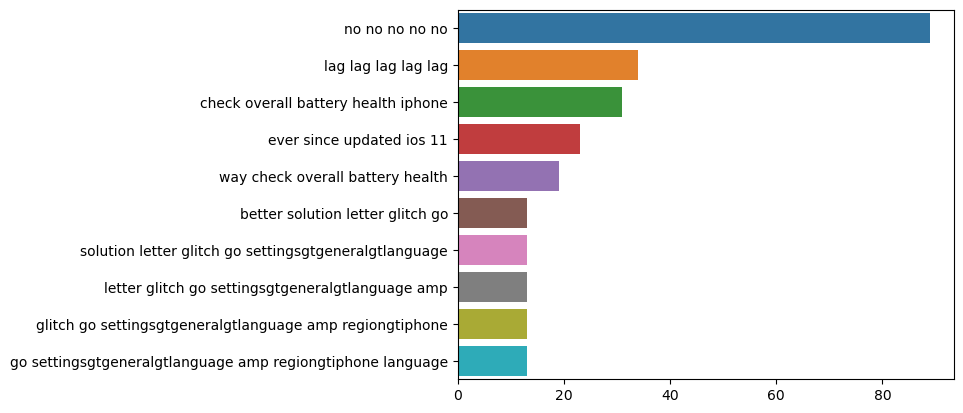

In [ ]:
# Visualising the most frequent trigrams in the tweets
top_pentgrams = get_top_ngram(apple['cleaned'],5)[:15]
x,y = map(list,zip(*top_pentgrams))
sns.barplot(x = y,y = x)

<AxesSubplot: >

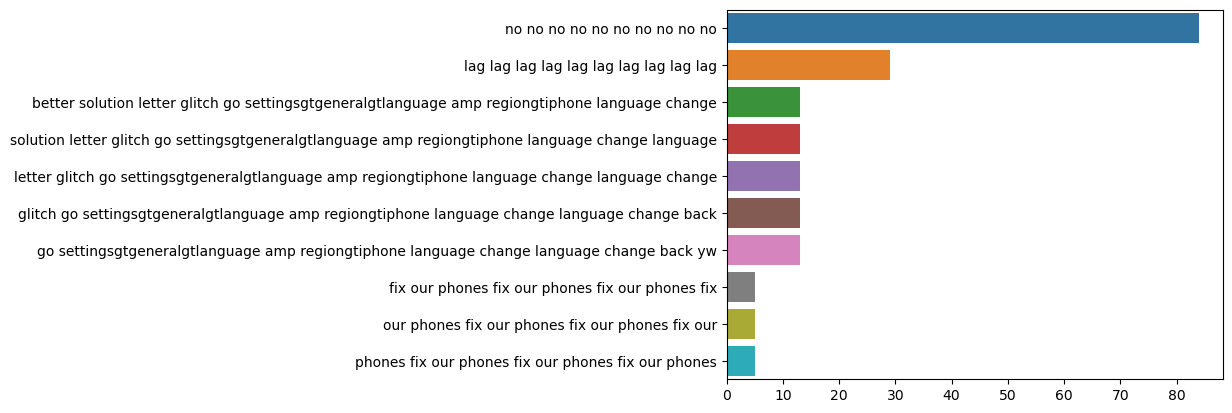

In [ ]:
# Visualising the most frequent trigrams in the tweets
top_decagrams = get_top_ngram(apple['cleaned'],10)[:15]
x,y = map(list,zip(*top_decagrams))
sns.barplot(x = y,y = x)

## Conversations have eventually moved out of the Twitter platform, the problem should be considered specific.

In [ ]:
specific = support[support['cleaned'].str.lower().str.contains('private message|direct message|dm', regex=True)]
specific

,tweet_id,author_id,created_at,text,response_tweet_id,in_response_to_tweet_id,receiver,Text,cleaned
3,4,sprintcare,2017-10-31 21:54:49,@115712 Please send us a Private Message so th...,3,5.0,115712,Please send us a Private Message so that we c...,Please send us Private Message assist Just cli...
5,6,sprintcare,2017-10-31 21:46:24,@115712 Can you please send us a private messa...,"5,7",8.0,115712,"Can you please send us a private message, so ...",Can please send us private message I gain deta...
7,11,sprintcare,2017-10-31 22:10:35,@115713 This is saddening to hear. Please shoo...,NaN,12.0,115713,This is saddening to hear. Please shoot us a ...,This saddening hear Please shoot us DM look KC
9,15,sprintcare,2017-10-31 20:03:31,@115713 We understand your concerns and we'd l...,12,16.0,115713,We understand your concerns and we'd like for...,We understand concerns wed like please send us...
13,19,sprintcare,2017-10-31 22:10:10,@115715 Please send me a private message so th...,NaN,20.0,115715,Please send me a private message so that I ca...,Please send private message I send link access...
...,...,...,...,...,...,...,...,...,...
2811754,2987933,UPSHelp,2017-11-30 07:54:51,"@823864 If you need assistance, please use the...",NaN,2987934.0,823864,"If you need assistance, please use the link p...",If need assistance please use link provided DM...
2811756,2987936,UPSHelp,2017-11-30 07:48:01,"@823865 If you need assistance, please use the...",NaN,2987937.0,823865,"If you need assistance, please use the link p...",If need assistance please use link provided DM...
2811762,2987941,AirAsiaSupport,2017-11-22 07:55:05,@823867 we have replied you via DM.Thanks-Emir,NaN,2987942.0,823867,we have replied you via DM.Thanks-Emir,replied via DMThanksEmir
2811766,139628,ArgosHelpers,2017-11-22 08:03:26,@134664 Can you Dm us your order number and we...,NaN,139627.0,134664,Can you Dm us your order number and we can lo...,Can Dm us order number look Georgia


In [ ]:
brand = support.groupby(by='author_id')

In [ ]:
x = brand.apply(lambda i: len(i))

In [ ]:
specific_brand = specific.groupby(by='author_id')

#### The percentage of tweets being moved in private for each brand.

In [ ]:
y = specific_brand.apply(lambda i: len(i))

In [ ]:
specific_perc = y / x
specific_perc

author_id
ATT                0.569176
ATVIAssist         0.212748
AWSSupport         0.011594
AdobeCare          0.093274
AirAsiaSupport     0.178190
                     ...   
mediatemplehelp    0.065574
nationalrailenq    0.005176
sainsburys         0.259581
sizehelpteam       0.524291
sprintcare         0.478799
Length: 108, dtype: float64

<AxesSubplot: >

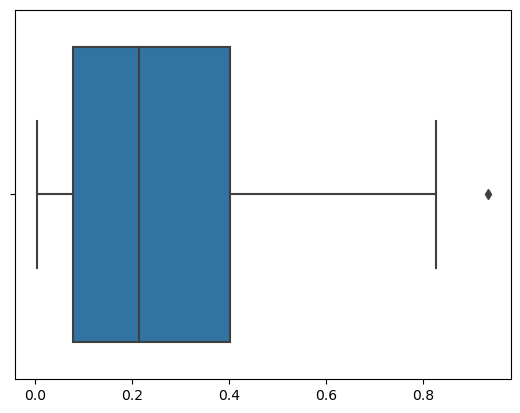

In [ ]:
sns.boxplot(x=specific_perc)

In [ ]:
print("Specific Tweet % for Apple: ", specific_perc['AppleSupport'])

Specific Tweet % for Apple:  0.517873853640277


#### Words from customers with high frequency.

In [ ]:
client_to_apple = client[client['receiver'] == 'AppleSupport']
client_to_apple

,tweet_id,author_id,created_at,text,response_tweet_id,in_response_to_tweet_id,receiver,Text,cleaned
397,697,115854,2017-10-31 22:31:23,@AppleSupport The newest update. I️ made sure ...,699,696.0,AppleSupport,The newest update. I️ made sure to download i...,The newest update I made sure download yesterday
399,698,115854,2017-10-31 22:17:40,@AppleSupport https://t.co/NV0yucs0lB,696,700.0,AppleSupport,https://t.co/NV0yucs0lB,httpstcoNV0yucs0lB
400,700,115854,2017-10-31 22:16:56,@AppleSupport why are my I️’s changing not sho...,698,NaN,AppleSupport,why are my I️’s changing not showing up corre...,Is changing showing correctly social media pla...
402,702,115855,2017-10-31 22:11:31,@AppleSupport Tried resetting my settings .. r...,701,703.0,AppleSupport,Tried resetting my settings .. restarting my ...,Tried resetting settings restarting phone
404,704,115855,2017-10-31 21:59:17,@AppleSupport This is what it looks like https...,703,705.0,AppleSupport,This is what it looks like https://t.co/XCQU2...,This looks like httpstcoXCQU2l4xUB
...,...,...,...,...,...,...,...,...,...
2811295,2987482,823733,2017-11-22 00:40:57,@AppleSupport why is my iPhone 7 constantly se...,2987481,NaN,AppleSupport,why is my iPhone 7 constantly searching for a...,iPhone 7 constantly searching signal works Im ...
2811311,2987500,823737,2017-11-22 01:21:40,@AppleSupport I updates slack and everything s...,NaN,2987499.0,AppleSupport,I updates slack and everything seems to be wo...,I updates slack everything seems working well ...
2811420,2987605,689907,2017-11-22 02:11:43,Hey @AppleSupport - not being able to duplicat...,2987604,NaN,AppleSupport,- not being able to duplicate a file in #page...,able duplicate file pages searched really anno...
2811422,2987607,823765,2017-11-22 02:17:14,Yo @AppleSupport is that weird glitch w/ the c...,2987606,NaN,AppleSupport,is that weird glitch w/ the capital “I️” your...,weird glitch w capital I attempt make tweets l...


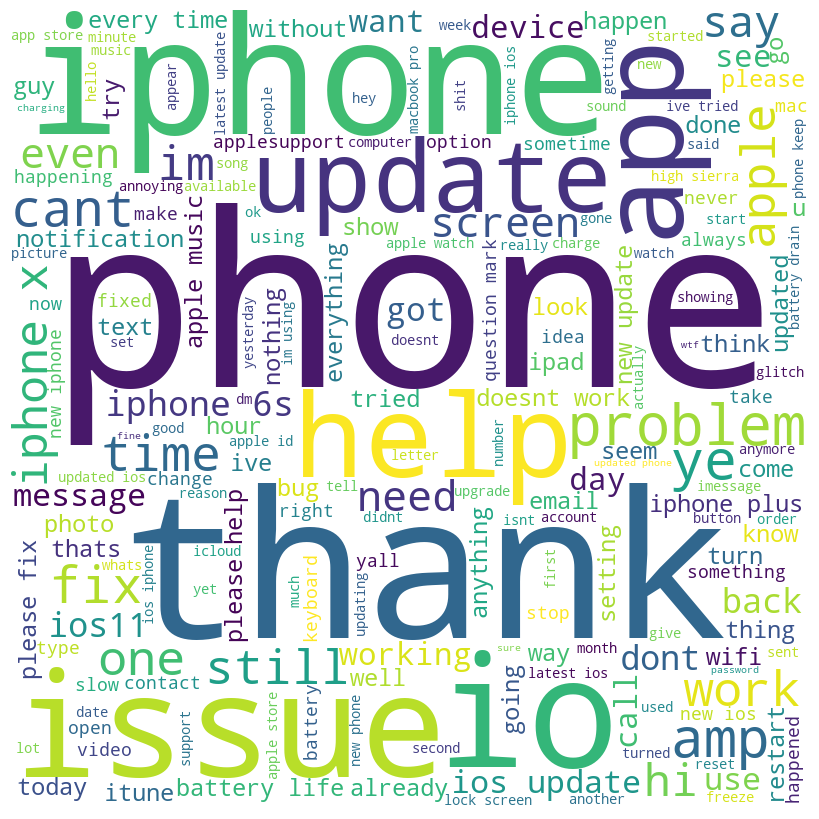

In [ ]:
comment_words = ''

# iterate through the csv file
for val in client_to_apple['cleaned']:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Q3 When do Support Teams receive more tweets from customers?

In [ ]:
tweet_time = client[['created_at', 'receiver']]
tweet_time.head()

,created_at,receiver
1,2017-10-31 22:11:45,sprintcare
2,2017-10-31 22:08:27,sprintcare
4,2017-10-31 21:49:35,sprintcare
6,2017-10-31 21:45:10,sprintcare
8,2017-10-31 22:04:47,sprintcare


In [ ]:
tweet_time['month'] = tweet_time['created_at'].dt.month
tweet_time['hour'] = tweet_time['created_at'].dt.hour
tweet_time['weekday'] = tweet_time['created_at'].dt.dayofweek

C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\1026290053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_time['month'] = tweet_time['created_at'].dt.month
C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\1026290053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_time['hour'] = tweet_time['created_at'].dt.hour
C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\1026290053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [ ]:
g = tweet_time.groupby(by='receiver')

In [ ]:
apple_time = g.get_group('AppleSupport')

<AxesSubplot: xlabel='month'>

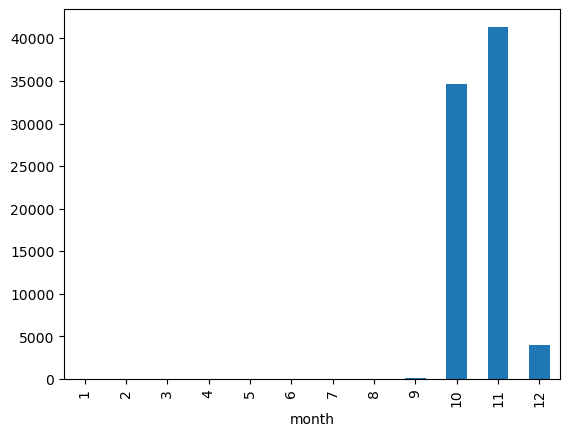

In [ ]:
apple_time.groupby(by='month').apply(lambda x: len(x)).plot.bar()

[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Sun')]

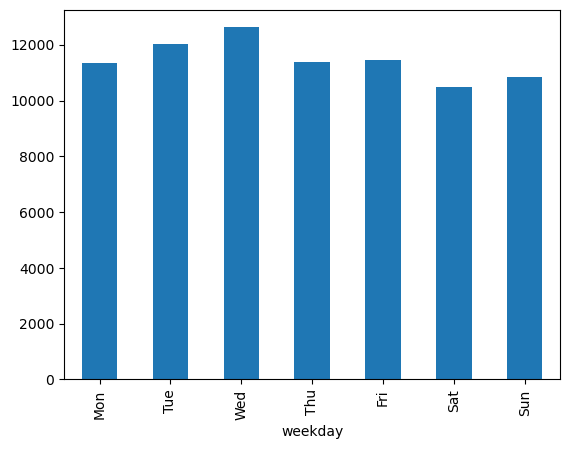

In [ ]:
apple_weekday = apple_time.groupby(by='weekday').apply(lambda x: len(x)).plot.bar()
apple_weekday.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

<AxesSubplot: xlabel='hour'>

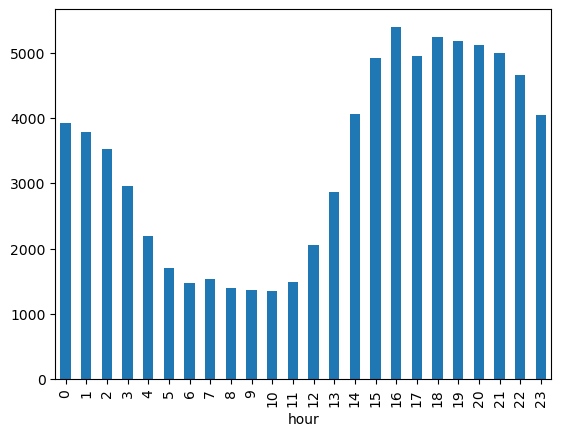

In [ ]:
apple_time.groupby(by='hour').apply(lambda x: len(x)).plot.bar()

# Q4 What are the most common terms in company responses? Is there a correlation between the average customer sentiment and the average company response sentiment?

## Response

In [ ]:
comp_resp=customer_company[customer_company.inbound == False]

In [ ]:
apple_response = comp_resp[comp_resp['author_id'] == 'AppleSupport']
apple_response.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,receiver,Text,cleaned,comp
396,696,AppleSupport,False,2017-10-31 22:27:49,@115854 We're here for you. Which version of t...,697,698.0,115854,We're here for you. Which version of the iOS ...,Were Which version iOS running Check Settings ...,0.0000
398,699,AppleSupport,False,2017-10-31 22:36:27,@115854 Lets take a closer look into this issu...,NaN,697.0,115854,Lets take a closer look into this issue. Sele...,Lets take closer look issue Select following l...,0.2960
401,701,AppleSupport,False,2017-10-31 22:26:49,@115855 Let's go to DM for the next steps. DM ...,NaN,702.0,115855,Let's go to DM for the next steps. DM us here...,Lets go DM next steps DM us httpstcoGDrqU22YpT,0.0000
403,703,AppleSupport,False,2017-10-31 22:09:52,@115855 Any steps tried since it started last ...,702,704.0,115855,Any steps tried since it started last night?,Any steps tried since started last night,0.0000
405,705,AppleSupport,False,2017-10-31 21:57:00,@115855 That's great it has iOS 11.1 as we can...,"706,704",707.0,115855,That's great it has iOS 11.1 as we can rule o...,Thats great iOS 111 rule outdated Any steps tr...,0.6662


In [ ]:
apple_response['word_count'] = apple_response['Text'].apply(lambda x: len(str(x).split(" ")))
apple_response[['Text','word_count']].head(5)

C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\3012395199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_response['word_count'] = apple_response['Text'].apply(lambda x: len(str(x).split(" ")))


,Text,word_count
396,We're here for you. Which version of the iOS ...,20
398,Lets take a closer look into this issue. Sele...,25
401,Let's go to DM for the next steps. DM us here...,13
403,Any steps tried since it started last night?,9
405,That's great it has iOS 11.1 as we can rule o...,26


<AxesSubplot: >

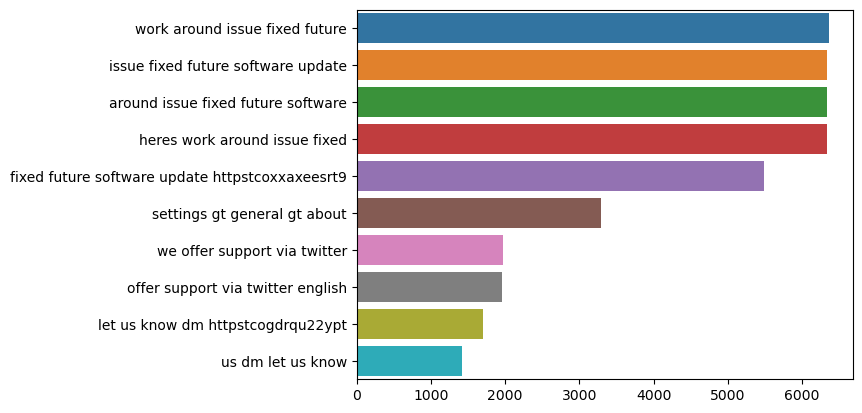

In [ ]:
# Visualising the most frequent trigrams in the tweets
top_pentgrams = get_top_ngram(apple_response['cleaned'],5)[:15]
x,y = map(list,zip(*top_pentgrams))
sns.barplot(x = y,y = x)

In [ ]:
comp_resp.receiver = comp_resp.receiver.fillna('0')
comp_resp = comp_resp[~comp_resp.receiver.str.match('[0-9]+')]
comp_resp.head()

C:\Users\bhatp\AppData\Local\Temp\ipykernel_6148\3818953216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_resp.receiver = comp_resp.receiver.fillna('0')


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,receiver,Text,cleaned,comp
4886,7341,marksandspencer,False,2017-11-10 15:42:36,@Tesco @117242 @117246 @117241 @sainsburys @11...,"7342,7343,7344,7338,7345",7346.0,Tesco,@117242 @117246 @117241 @sainsburys @117248 @...,117242 117246 117241 sainsburys 117248 AldiUK ...,0.0000
4909,7411,marksandspencer,False,2017-11-08 20:48:40,@Tesco @117242 @sainsburys @117248 @AldiUK @11...,"7412,7409",7413.0,Tesco,@117242 @sainsburys @117248 @AldiUK @117260 @...,117242 sainsburys 117248 AldiUK 117260 117249 ...,0.5994
17741,22969,GWRHelp,False,2017-10-31 20:45:24,@nationalrailenq @121001 As stated on our site...,"22964,22970,22971",22972.0,nationalrailenq,@121001 As stated on our site Advance tickets...,121001 As stated site Advance tickets availabl...,0.0000
20347,26214,AirAsiaSupport,False,2017-11-01 01:45:34,@이연희 You will be updated as soon as possible o...,26213,NaN,이연희,You will be updated as soon as possible once ...,You updated soon possible processed completed ...,0.3612
25981,32770,GWRHelp,False,2017-11-01 13:23:19,@SW_Help @123279 2/2 We're hoping to be able t...,32773,32769.0,SW_Help,@123279 2/2 We're hoping to be able to releas...,123279 22 Were hoping able release week Lewis,0.4215


In [ ]:
comp_resp_sent = pd.DataFrame(comp_resp.groupby('receiver')['comp'].mean()).sort_values(by=['comp'])
comp_resp_sent = comp_resp_sent[comp_resp_sent.index.isin(support.author_id.unique())]
comp_resp_sent

,comp
receiver,
idea_cares,-0.709600
O2,-0.278700
airtel_care,-0.229800
TwitterSupport,0.000000
Postmates_Help,0.000000
NortonSupport,0.000000
AmericanAir,0.000000
VerizonSupport,0.000000
LondonMidland,0.086686


In [ ]:
comp_resp_sent.head(10)

,response_sent
receiver,
idea_cares,-0.709600
O2,-0.278700
airtel_care,-0.229800
TwitterSupport,0.000000
Postmates_Help,0.000000
NortonSupport,0.000000
AmericanAir,0.000000
VerizonSupport,0.000000
LondonMidland,0.086686


In [ ]:
comp_resp_sent[-10:]

,response_sent
receiver,
TfL,0.399025
DoorDash_Help,0.401900
PearsonSupport,0.458800
MicrosoftHelps,0.555067
McDonalds,0.557400
UPSHelp,0.589100
Delta,0.607400
BofA_Help,0.612400
AskeBay,0.641011


In [ ]:
comp_resp_sent = comp_resp_sent.rename(columns={"comp": "response_sent"})
comp_resp_sent.to_csv('company_response_sentiment.csv')

In [ ]:
result = pd.concat([avg_response_time, comp_resp_sent,comp_wise_cust_sentiment], axis=1)
result

,response_time_min,response_sent,customer_comp
receiver,,,
Postmates_Help,3.764945,0.000000,0.020954
VirginTrains,7.113722,0.142938,0.074081
LondonMidland,7.628116,0.086686,0.040598
VerizonSupport,7.929221,0.000000,0.034671
AlaskaAir,8.961892,NaN,0.137968
...,...,...,...
ATVIAssist,2171.287875,NaN,0.040977
askvisa,3231.701814,0.923000,0.061272
airtel_care,3303.582437,-0.229800,0.080360


In [ ]:
result.to_csv('combined_results.csv')

In [ ]:
sns.pairplot(result, kind="scatter")
plt.show()

In [ ]:
result.plot()

# Video Presentation-
https://youtu.be/WvJo4g-W17o